In [1]:
from IPython.display import Image, display


couch = {"name": "couch", "type": "furniture", "image":"couch.png"}

queen_bed = {"name": "queen bed", "type": "furniture", "image": "queen_bed.png" }

double_bed = {"name": "double bed", "type": "furniture", "image": "double_bed.png" }

dresser = {"name": "dresser", "type": "furniture", "image": "dresser.png"}

dining_table = {"name": "dining table", "type": "furniture", "image":"dining_table.png"}

door_a = {"name": "door a", "type": "door", "image":"door.png"}

door_b = {"name": "door b", "type": "door", "image":"door.png"}

door_c = {"name": "door c", "type": "door", "image":"door.png"}

door_d = {"name": "door d","type": "door", "image":"door.png"}

coins = {"name": "some spare change", "type": "misc"}

key_a = {"name": "key for door a", "type": "key", "target": door_a}

key_b = {"name": "key for door b", "type": "key", "target": door_b}

key_c = {"name": "key for door c", "type": "key", "target": door_c}

key_d = {"name": "key for door d", "type": "key", "target": door_d}

piano = {"name": "piano", "type": "furniture", "image":"piano.png"}

bedroom_1 = {"name": "bedroom 1", "type": "room"}

bedroom_2 = {"name": "bedroom 2", "type": "room"}

living_room = {"name": "the living room", "type": "room"}

game_room = {"name": "the game room", "type": "room"}

outside = {"name": "outside", "type": "room"}

all_rooms = [game_room, outside, living_room, bedroom_1, bedroom_2]

all_doors = [door_a, door_b, door_c, door_d]

# define which items/rooms are related

def init_object_relations():
    object_relations = {
        "the game room": [couch, piano, door_a],
        "bedroom 1": [queen_bed, door_a, door_b, door_c],
        "bedroom 2": [double_bed, dresser, door_b],
        "the living room": [dining_table, door_c, door_d],
        "couch": [coins],
        "piano": [key_a],
        "queen bed": [key_b],
        "double bed": [key_c],
        "dresser": [key_d],
        "outside": [door_d],
        "door a": [game_room, bedroom_1],
        "door b": [bedroom_1, bedroom_2],
        "door c": [bedroom_1, living_room],
        "door d": [outside, living_room]
    }
    return object_relations

# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

def init_game_state():
    INIT_GAME_STATE = {
        "current_room": game_room,
        "keys_collected": [],
        "target_room": outside
    }
    return(INIT_GAME_STATE)


In [3]:
def yes_no_input(prompt):
  """
  Provides the user with a choice of yes/no for a given prompt
  """
  while True:
    choice = input(prompt).strip().lower()
    if choice == "y":
      choice = "yes"
    if choice == "n":
      choice = "no"
    if choice in ["yes", "no"]:
      return choice
    print("Please only input 'yes' or 'no'.")

def end_game():
    """
    Asks if you want to restart
    Restarts the game if yes
    Ends the game if no
    """
    restart = yes_no_input("Do you want to play again? ")

    if restart == "yes":
      global game_state
      global object_relations

      game_state = init_game_state()
      object_relations = init_object_relations()
      start_game()
    else: print("Thanks for playing!")

def start_game():
    """
    Starts the game
    Provides some starting text
    Goes to the first room to play
    """
    print("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before.")
    print("You don't remember why you are here and what happened before.")
    print("You feel some unknown danger is approaching and you must get out of the house, NOW!\n")

    room = game_state["current_room"]
    play_room(room)

def play_room(room):
    """
    Plays a room.
    Checks if the curren room being is the target room.
    If it is, the game will end with success.
    Otherwise, tells the player what room they are in and what items are in there.
    Then Prompts the player to examine an item
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("Congrats! You escaped the room!")
        end_game()
    else:
        explore_room(room)
        print()
        examine_item(input("What would you like to examine? ").strip().lower().replace("a ","").replace("the ",""))


def explore_room(room):
    """
    Explore a room.
    Tells the player what room they are in
    List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You are in " + room["name"])
    print("In the room there is: a " + ", a ".join(items))


def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the chosen door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
          return room

def examine_door(item, current_room):
  """
  Handles what happens if the player examines a door.
  If the player has the key for that door, the door unlocks
  and the player is asked if they want to go the next room.
  If the player doesn't have the key, goes back to playing the current room.
  """
  have_key = False
  for key in game_state["keys_collected"]:
    if("target" in key and key["target"] == item):
      have_key = True
  if(have_key):
      print("You use the key to unlock the door.")
      next_room = get_next_room_of_door(item, current_room)
      if next_room:
        while True:
            change_room = yes_no_input("Do you want to go to the next room? ")
            if change_room == "yes":
                print()
                play_room(next_room)
                break
            elif change_room == "no":
                print()
                play_room(current_room)
                break

  else:
      print("The door is locked and you don't have the key.")
      play_room(current_room)


def examine_item(item_name):
    """
    Checks that the inputted item is in the current room, if not asks to try again.
    If the item is a door goes to the function for handling doors.
    If the item is not a door, then check if it contains any items.
    Collect the item if found and update the game state. At the end,
    goes back to playing the current room.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    print()

    for item in object_relations[current_room["name"]]:
        if item["name"] == item_name:
            output = "You examine the " + item_name + ". "
            
            if "image" in item:
                display(Image(filename=item["image"], width=300, height=300))

            if(item["type"] == "door"):
                examine_door(item, current_room)

            else:
              if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                    print(output)
                    print()
              else:
                    output += "There isn't anything interesting about it."
                    print(output)
                    print()

            play_room(current_room)


    if output is None:
        print("The item you requested can not be found in the current room.\n")

You wake up on a couch and find yourself in a strange house with no windows which you have never been to before.
You don't remember why you are here and what happened before.
You feel some unknown danger is approaching and you must get out of the house, NOW!

You are in the game room
In the room there is: a couch, a piano, a door a



What would you like to examine?  piano


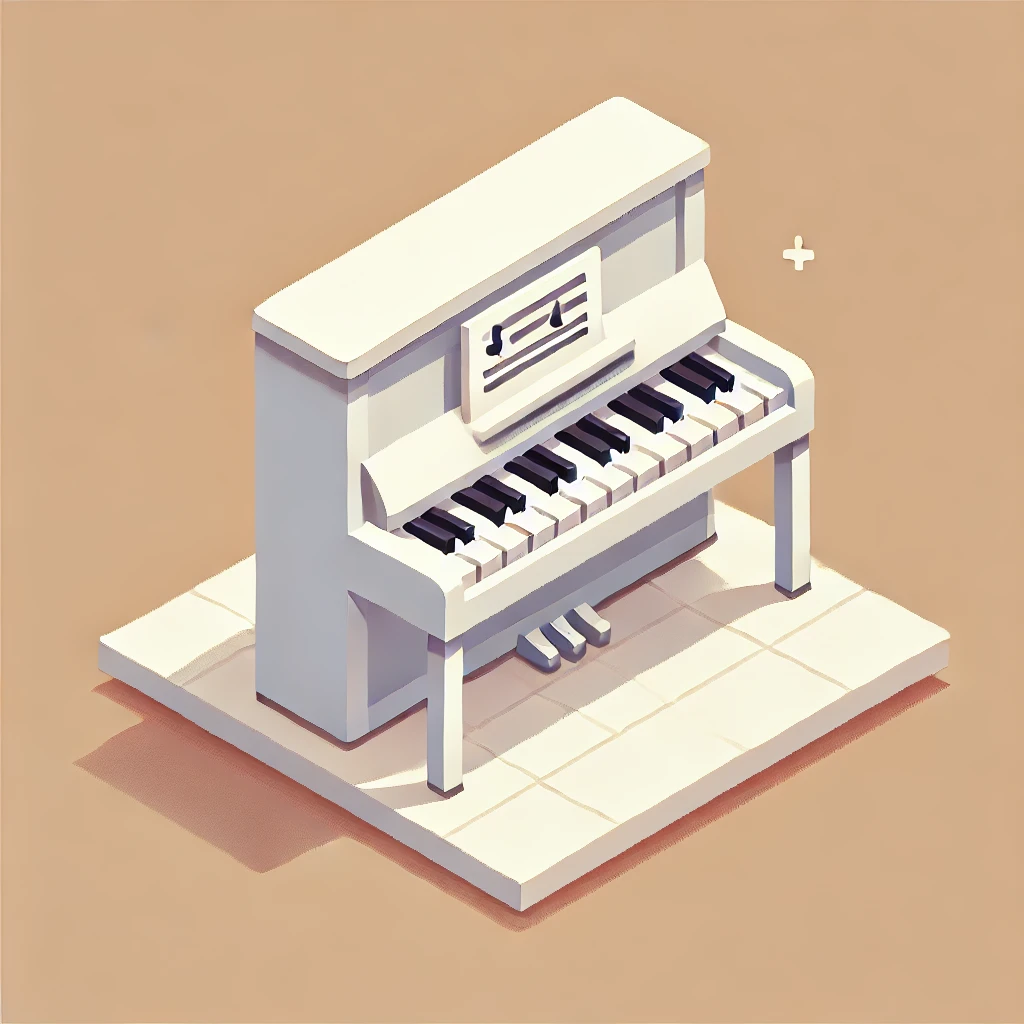

You examine the piano. You find key for door a.

You are in the game room
In the room there is: a couch, a piano, a door a



In [ ]:
game_state = init_game_state()
object_relations = init_object_relations()

start_game()